importing libraries

In [32]:
import pandas as pd
import numpy as np
import sklearn
import datetime as dt

Reading in the data

In [33]:
aal = pd.read_csv("AAL.csv")
pfe = pd.read_csv("PFE.csv")
rds = pd.read_csv("RDS-A.csv")
sp = pd.read_csv("SP500.csv")
tsla = pd.read_csv("tsla.csv")
wmt = pd.read_csv("WMT.csv")

Dates are correct. Verified for each '2019-01-02' to '2019-12-31'

In [34]:
tsla["Date"].min()

'2019-01-02'

In [4]:
tsla["Date"].max()

'2019-12-31'

segmenting the data only for adj close

In [35]:
a = aal[["Date","Adj Close"]]
p = pfe[["Date","Adj Close"]]
r = rds[["Date","Adj Close"]]
s = sp[["Date","Adj Close"]]
t = tsla[["Date","Adj Close"]]
w = wmt[["Date","Adj Close"]]

renaming adj close to respective stock

In [36]:
a.rename(columns={"Adj Close":"aal"},inplace=True)
p.rename(columns={"Adj Close":"pfe"},inplace=True)
r.rename(columns={"Adj Close":"rds"},inplace=True)
s.rename(columns={"Adj Close":"sp"},inplace=True)
t.rename(columns={"Adj Close":"tsla"},inplace=True)
w.rename(columns={"Adj Close":"wmt"},inplace=True)

C:\Users\urvaksh\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Combining the data sets

In [37]:
data = [a,p,r,s,t,w]

In [38]:
from functools import reduce
data = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), data)


In [39]:
data

,Date,aal,pfe,rds,sp,tsla,wmt
0,2019-01-02,31.963161,36.581043,57.608135,2510.03,62.023998,88.933044
1,2019-01-03,29.581667,35.557625,57.481926,2447.89,60.071999,88.475723
2,2019-01-04,31.530159,36.369591,58.782818,2531.94,63.537998,89.028336
3,2019-01-07,32.425682,36.564133,58.860485,2549.69,66.991997,90.076393
4,2019-01-08,31.904110,36.733288,58.501282,2574.41,67.070000,90.705231
...,...,...,...,...,...,...,...
247,2019-12-24,29.072563,34.465500,58.700001,3223.38,85.050003,116.173569
248,2019-12-26,29.560759,34.544449,58.869999,3239.91,86.188004,116.183289
249,2019-12-27,28.335287,34.491821,59.090000,3240.02,86.075996,116.251328
250,2019-12-30,28.195801,34.132160,58.680000,3221.29,82.940002,116.066643


First 5 rows for assets and total counts

In [41]:
data[["aal","pfe","rds","tsla","wmt"]].head()

,aal,pfe,rds,tsla,wmt
0,31.963161,36.581043,57.608135,62.023998,88.933044
1,29.581667,35.557625,57.481926,60.071999,88.475723
2,31.530159,36.369591,58.782818,63.537998,89.028336
3,32.425682,36.564133,58.860485,66.991997,90.076393
4,31.904110,36.733288,58.501282,67.070000,90.705231


In [42]:
len(data[["aal","pfe","rds","tsla","wmt"]]) ## 252 rows

252

In [43]:
data["sp"].head()

0    2510.03
1    2447.89
2    2531.94
3    2549.69
4    2574.41
Name: sp, dtype: float64

In [44]:
len(data["sp"])##252 rows 

252

function for calculating daily % change

pct_change easiest way to find the change or we could develop a function, but it already provided
1 is used for the one year

Finding the pct change for each respective column and making new columns

In [45]:
data.set_index("Date")

,aal,pfe,rds,sp,tsla,wmt
Date,,,,,,
2019-01-02,31.963161,36.581043,57.608135,2510.03,62.023998,88.933044
2019-01-03,29.581667,35.557625,57.481926,2447.89,60.071999,88.475723
2019-01-04,31.530159,36.369591,58.782818,2531.94,63.537998,89.028336
2019-01-07,32.425682,36.564133,58.860485,2549.69,66.991997,90.076393
2019-01-08,31.904110,36.733288,58.501282,2574.41,67.070000,90.705231
...,...,...,...,...,...,...
2019-12-24,29.072563,34.465500,58.700001,3223.38,85.050003,116.173569
2019-12-26,29.560759,34.544449,58.869999,3239.91,86.188004,116.183289
2019-12-27,28.335287,34.491821,59.090000,3240.02,86.075996,116.251328


There are no nulls we will get a nan for the first row since no prior day

In [46]:
data["sp"].isnull().sum()

0

In [16]:
data["aal_change"] = data["aal"].pct_change(1)
data["pfe_change"] = data["pfe"].pct_change(1)
data["rds_change"] = data["rds"].pct_change(1)
data["tsla_change"] = data["tsla"].pct_change(1)
data["wmt_change"] = data["wmt"].pct_change(1)
data["sp_change"] = data["sp"].pct_change(1)


new data

In [17]:
data

,Date,aal,pfe,rds,sp,tsla,wmt,aal_change,pfe_change,rds_change,tsla_change,wmt_change,sp_change
0,2019-01-02,31.963161,36.581043,57.608135,2510.03,62.023998,88.933044,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,29.581667,35.557625,57.481926,2447.89,60.071999,88.475723,-0.074507,-0.027977,-0.002191,-0.031472,-0.005142,-0.024757
2,2019-01-04,31.530159,36.369591,58.782818,2531.94,63.537998,89.028336,0.065868,0.022835,0.022631,0.057697,0.006246,0.034336
3,2019-01-07,32.425682,36.564133,58.860485,2549.69,66.991997,90.076393,0.028402,0.005349,0.001321,0.054361,0.011772,0.007010
4,2019-01-08,31.904110,36.733288,58.501282,2574.41,67.070000,90.705231,-0.016085,0.004626,-0.006103,0.001164,0.006981,0.009695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2019-12-24,29.072563,34.465500,58.700001,3223.38,85.050003,116.173569,-0.004096,-0.000763,-0.001701,0.014384,0.004033,-0.000195
248,2019-12-26,29.560759,34.544449,58.869999,3239.91,86.188004,116.183289,0.016792,0.002291,0.002896,0.013380,0.000084,0.005128
249,2019-12-27,28.335287,34.491821,59.090000,3240.02,86.075996,116.251328,-0.041456,-0.001523,0.003737,-0.001300,0.000586,0.000034
250,2019-12-30,28.195801,34.132160,58.680000,3221.29,82.940002,116.066643,-0.004923,-0.010427,-0.006939,-0.036433,-0.001589,-0.005781


we will use matplotlib and seaborn two big data visualazation tools

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)  #### for setting the size of plots

Text(0.5, 1.0, 'sp % change')

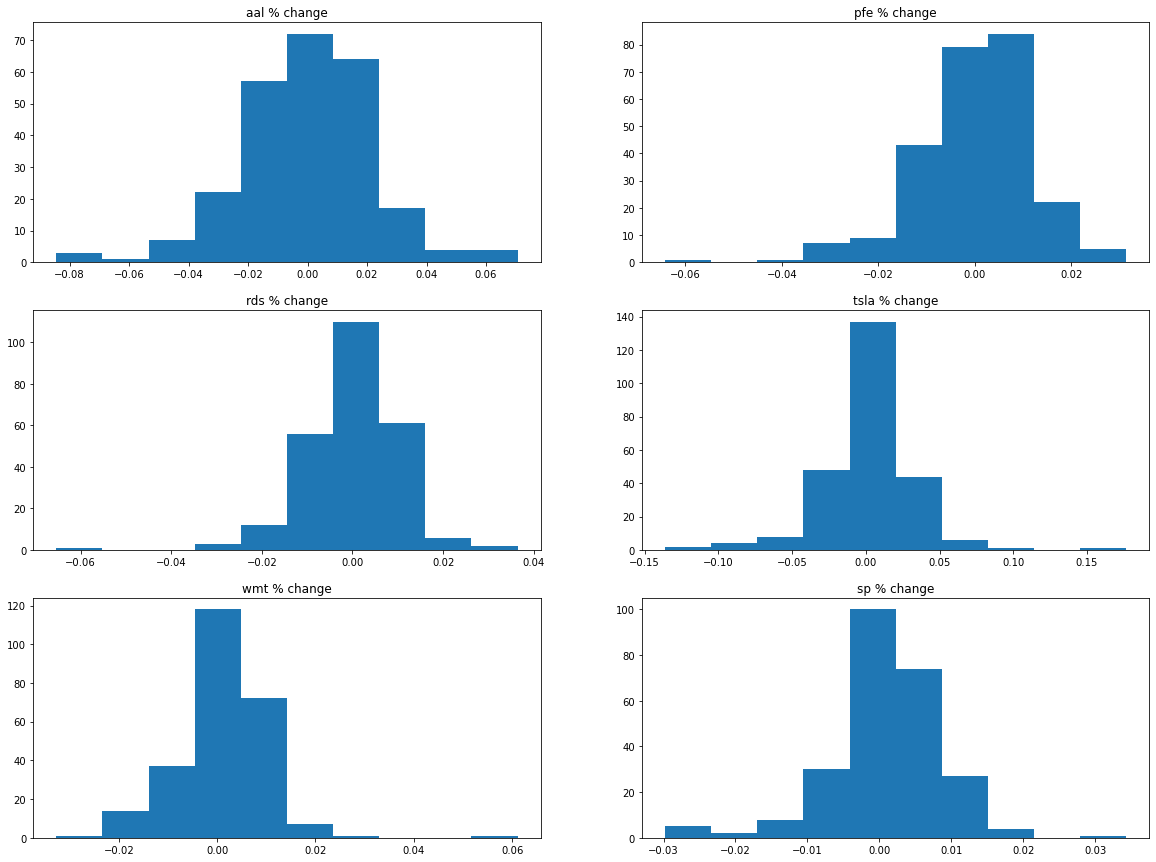

In [19]:
figure, axis = plt.subplots(3, 2)
axis[0,0].hist(data["aal_change"])
axis[0, 0].set_title("aal % change")

axis[0,1].hist(data["pfe_change"])
axis[0, 1].set_title("pfe % change")

axis[1,0].hist(data["rds_change"])
axis[1, 0].set_title("rds % change")

axis[1,1].hist(data["tsla_change"])
axis[1, 1].set_title("tsla % change")

axis[2,0].hist(data["wmt_change"])
axis[2,0].set_title("wmt % change")

axis[2,1].hist(data["sp_change"])
axis[2, 1].set_title("sp % change")



In [20]:
num_cols = ["aal_change","pfe_change","rds_change","tsla_change","wmt_change","sp_change"]

In [21]:
for i in num_cols:
    print("This is the mean for {}: {}".format(i,data[i].mean()))
    print("This is the standard deviation for {}: {}".format(i,data[i].std()))
    print("This is the min for {}: {}".format(i,data[i].min()))
    print("This is the variance for {}: {}".format(i,data[i].var()))
    print("This is the max for {}: {}".format(i,data[i].max()))

This is the mean for aal_change: -0.00019505121873511069
This is the standard deviation for aal_change: 0.022416643529316885
This is the min for aal_change: -0.08441744193139245
This is the variance for aal_change: 0.0005025059071204646
This is the max for aal_change: 0.07058827725221106
This is the mean for pfe_change: -0.00017642126752486468
This is the standard deviation for pfe_change: 0.011983375565299409
This is the min for pfe_change: -0.06417376273472009
This is the variance for pfe_change: 0.00014360128993901492
This is the max for pfe_change: 0.031368471765851114
This is the mean for rds_change: 0.00015035192679433172
This is the standard deviation for rds_change: 0.010614451053853936
This is the min for rds_change: -0.0653522032970617
This is the variance for rds_change: 0.00011266657117466094
This is the max for rds_change: 0.03643383993887972
This is the mean for tsla_change: 0.001667754820083009
This is the standard deviation for tsla_change: 0.03081721229051187
This is t

bringing linea regression model, statmodels can also be used for linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression() ## initializing linear regression model

fitting on all of them. The first rows are nan which we can't have unsure on how to fill this. I will go with filling it with the mean. This can be changed in the future. I'm not sure if professor discussed what to do with nans

In [24]:
data["aal_change"].fillna(data["aal_change"].mean(),inplace=True)
data["rds_change"].fillna(data["rds_change"].mean(),inplace=True)
data["pfe_change"].fillna(data["pfe_change"].mean(),inplace=True)
data["tsla_change"].fillna(data["tsla_change"].mean(),inplace=True)
data["sp_change"].fillna(data["sp_change"].mean(),inplace=True)
data["wmt_change"].fillna(data["wmt_change"].mean(),inplace=True)

In [25]:
len(data["sp_change"])

252

We need to reshape the pandas series to a certain format so we can fit the regression

In [26]:
aal_vs_sp= lr.fit(data["aal_change"].values.reshape(1, -1),data["sp_change"].values.reshape(1, -1))
pfe_vs_sp= lr.fit(data["pfe_change"].values.reshape(-1, 1),data["sp_change"].values.reshape(-1, 1))
rde_vs_sp= lr.fit(data["rds_change"].values.reshape(-1, 1),data["sp_change"].values.reshape(-1, 1))
wmt_vs_sp= lr.fit(data["wmt_change"].values.reshape(-1, 1),data["sp_change"].values.reshape(-1, 1))
tsla_vs_sp= lr.fit(data["tsla_change"].values.reshape(-1, 1),data["sp_change"].values.reshape(-1, 1))

plotting the samples vs linear model. y = mx+b
From the text it not clear what she wants us to plot. I probably missed something in class.
Does she want us to plot the predicted value vs the sample?

Alternative method is to use 
seaborn plot method and plot using lmplot. 

In [27]:
aal_vs_sp.coef_[0]

array([0.08601372])

Text(0, 0.5, 'sp500')

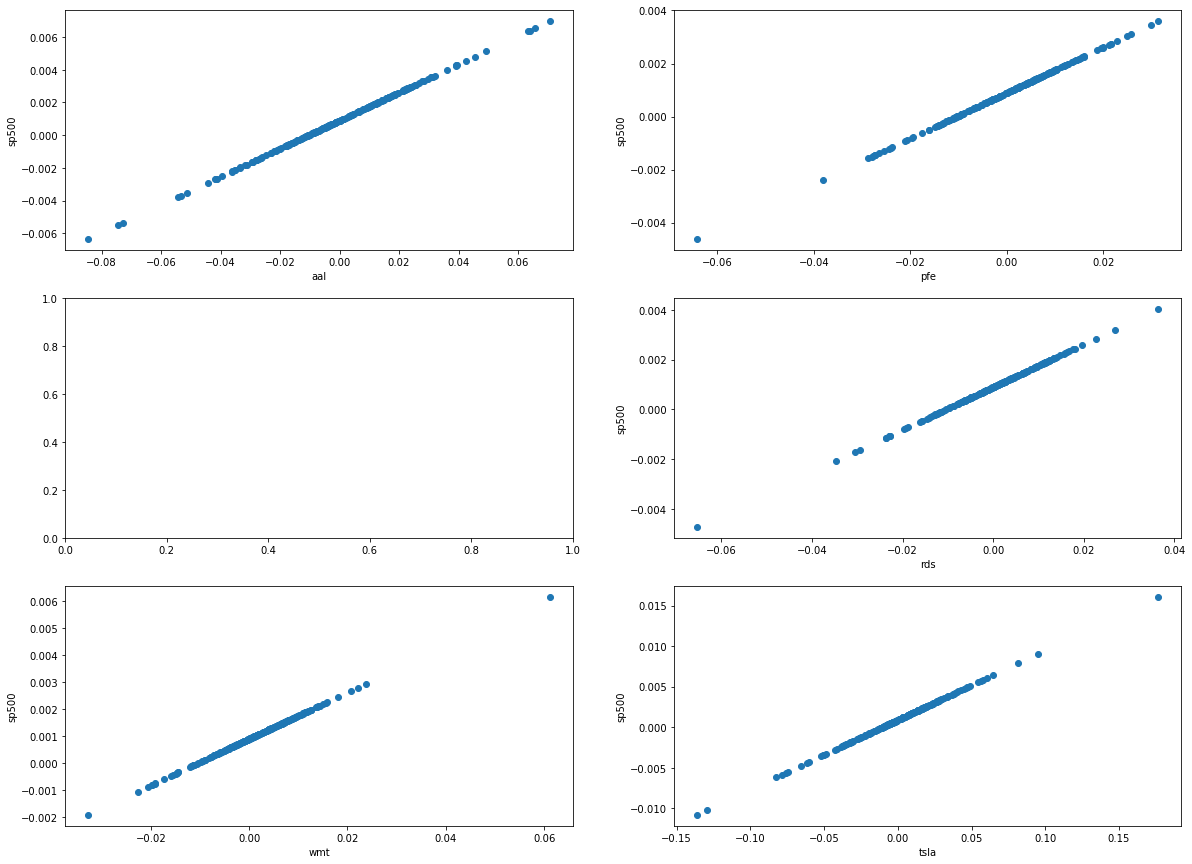

In [28]:
figure, axis = plt.subplots(3, 2)

axis[0,0].scatter(data["aal_change"],(aal_vs_sp.coef_[0]*data["aal_change"] + aal_vs_sp.intercept_))
axis[0,0].set_xlabel("aal")
axis[0,0].set_ylabel("sp500")


axis[0,1].scatter(data["pfe_change"],(pfe_vs_sp.coef_[0]*data["pfe_change"] + pfe_vs_sp.intercept_))
axis[0,1].set_xlabel("pfe")
axis[0,1].set_ylabel("sp500")


axis[1,1].scatter(data["rds_change"],(rde_vs_sp.coef_[0]*data["rds_change"] + rde_vs_sp.intercept_))
axis[1,1].set_xlabel("rds")
axis[1,1].set_ylabel("sp500")

axis[2,0].scatter(data["wmt_change"],(wmt_vs_sp.coef_[0]*data["wmt_change"] + wmt_vs_sp.intercept_))
axis[2,0].set_xlabel("wmt")
axis[2,0].set_ylabel("sp500")

axis[2,1].scatter(data["tsla_change"],(tsla_vs_sp.coef_[0]*data["tsla_change"] + tsla_vs_sp.intercept_))
axis[2,1].set_xlabel("tsla")
axis[2,1].set_ylabel("sp500")

Now we need to get the metrics we import the modules

r2score and mse will be computed from predicted values and actual valus of sp500 based on linear model. Does she want us to split up data in train test split. I'm not sure.

(actual,pred)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
### getting all the predictions to perform r2 and mse calculations
aal_pred = aal_vs_sp.predict(data["aal_change"].values.reshape(-1, 1))
rds_pred = rde_vs_sp.predict(data["rds_change"].values.reshape(-1, 1))
tsla_pred = tsla_vs_sp.predict(data["tsla_change"].values.reshape(-1, 1))
pfe_pred = pfe_vs_sp.predict(data["pfe_change"].values.reshape(-1, 1))
wmt_pred = wmt_vs_sp.predict(data["wmt_change"].values.reshape(-1, 1))



In [31]:
print("coef for aal vs sp is: {}, intercept: {}".format(aal_vs_sp.coef_[0],aal_vs_sp.intercept_[0]))
print("r2score for aal vs sp is {}".format(r2_score(data["sp_change"],aal_pred)))
print("mse for aal vs sp is {}".format(mean_squared_error(data["sp_change"],aal_pred)))


print("coef for rds vs sp is: {}, intercept: {}".format(rde_vs_sp.coef_[0],rde_vs_sp.intercept_[0]))
print("r2score for rds vs sp is {}".format(r2_score(data["sp_change"],rds_pred)))
print("mse for rds vs sp is {}".format(mean_squared_error(data["sp_change"],rds_pred)))


print("coef for pfe vs sp is: {}, intercept: {}".format(pfe_vs_sp.coef_[0],pfe_vs_sp.intercept_[0]))
print("r2score for pfe vs sp is {}".format(r2_score(data["sp_change"],pfe_pred)))
print("mse for pfe vs sp is {}".format(mean_squared_error(data["sp_change"],pfe_pred)))


print("coef for tsla vs sp is: {}, intercept: {}".format(tsla_vs_sp.coef_[0],tsla_vs_sp.intercept_[0]))
print("r2score for tsla vs sp is {}".format(r2_score(data["sp_change"],tsla_pred)))
print("mse for tsla vs sp is {}".format(mean_squared_error(data["sp_change"],tsla_pred)))

print("coef for wmt vs sp is: {}, intercept: {}".format(wmt_vs_sp.coef_[0],wmt_vs_sp.intercept_[0]))
print("r2score for wmt vs sp is {}".format(r2_score(data["sp_change"],wmt_pred)))
print("mse for wmt vs sp is {}".format(mean_squared_error(data["sp_change"],wmt_pred)))

coef for aal vs sp is: [0.08601372], intercept: 0.0008936792174748231
r2score for aal vs sp is 0.21179985915781807
mse for aal vs sp is 4.84601005318551e-05
coef for rds vs sp is: [0.08601372], intercept: 0.0008936792174748231
r2score for rds vs sp is 0.11164973896667285
mse for rds vs sp is 5.4617527613198413e-05
coef for pfe vs sp is: [0.08601372], intercept: 0.0008936792174748231
r2score for pfe vs sp is 0.1111480661998423
mse for pfe vs sp is 5.464837144518343e-05
coef for tsla vs sp is: [0.08601372], intercept: 0.0008936792174748231
r2score for tsla vs sp is 0.11337410087100319
mse for tsla vs sp is 5.451151043950461e-05
coef for wmt vs sp is: [0.08601372], intercept: 0.0008936792174748231
r2score for wmt vs sp is 0.07574638910332909
mse for wmt vs sp is 5.6824936434451564e-05


The most correlated and least correlated assets will be the ones with the highest and lowest r^2 respectively.

So the highest corre;ated is aal and the least correlated is wmt